In [33]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()#loading data
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w1 = std*np.random.randn(Din, K) 
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
n = x_train.shape[0]  # No. of training examples
#adding a bias dimension with a constant of 1 to all input vectors
x_train_new = np.concatenate((np.ones((x_train.shape[0],1)),x_train), axis=1)
x_test_new  = np.concatenate((np.ones((x_test.shape[0],1)),x_test), axis=1)
w1_new = np.concatenate((b1.reshape(1,K), w1), axis=0)# adding bias vector to weight matrix to create single matrix
print('x_train_new', x_train_new.shape)
print('x_test_new', x_test_new.shape)
print('W1_new',w1_new.shape)
n1 = x_test_new.shape[0]
def accuracy(pre_val,true_val):
    pre_class = np.argmax(pre_val, axis=1)
    acc_class = np.argmax(true_val, axis=1)
    valid_pred = [pre_class == acc_class]
    return np.sum(valid_pred)/len(acc_class)

x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)
w1: (3072, 10)
b1: (10,)
x_train_new (50000, 3073)
x_test_new (10000, 3073)
W1_new (3073, 10)


In [34]:
batch_size = Ntr
iterations =300
lr =0.014
lr_decay=0.9
reg =1e-5
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
test_loss = []
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
#indices = np.arange(Ntr)
#rng.shuffle(indices)

# Forward pass
    hyp=x_train_new.dot(w1_new)
    loss = (1/(2*n))*np.sum(( hyp - y_train)**2) + (1/(2*n))*reg*np.sum(w1_new**2) 
    loss_history.append(loss)
    
# Backward pass
    dw1 = (1/n)*(x_train_new.T.dot(hyp - y_train))  + (1/n)*reg*w1_new
    w1_new = w1_new - lr*dw1
   
    t = (1/(2*n1))*np.sum(( x_test_new.dot(w1_new) - y_test)**2) + (1/(2*n1))*reg*np.sum(w1_new**2) 
    test_loss.append(t)
    train_acc = accuracy(hyp, y_train)
    valid_acc = accuracy(x_test_new.dot(w1_new), y_test)
    val_acc_history.append(valid_acc)
    train_acc_history.append(train_acc)
    lr = lr*lr_decay   # new learning rate 
    
    
# Printing accuracies and displaying w as images



In [37]:
print(test_loss)

[0.48456220732446437, 0.47827591290450566, 0.4740520388771829, 0.4708967937406205, 0.46841870032288957, 0.4664095155507857, 0.4647443307060196, 0.46334221704950274, 0.4621475984829756, 0.4611205237354749, 0.4602312092851059, 0.4594567936200693, 0.4587793086239072, 0.45818435663257157, 0.4576602155386517, 0.4571972140099543, 0.4567872831794017, 0.45642362720244156, 0.4561004760680358, 0.4558128967011168, 0.4555566462597088, 0.45532805655766545, 0.45512394183976906, 0.4549415243461023, 0.45477837361564244, 0.4546323565344194, 0.4545015958824165, 0.45438443567305825, 0.45427941197365296, 0.4541852281873619, 0.4541007339963293, 0.45402490733167744, 0.45395683886326693, 0.45389571860050343, 0.4538408242722362, 0.45379151121421063, 0.4537472035404566, 0.4537073864132948, 0.4536715992574624, 0.4536394297888361, 0.45361050874859254, 0.45358450525035376, 0.4535611226616471, 0.4535400949524461, 0.45352118345309617, 0.45350417397192777, 0.4534888742295852, 0.4534751115728088, 0.4534627309352382, 

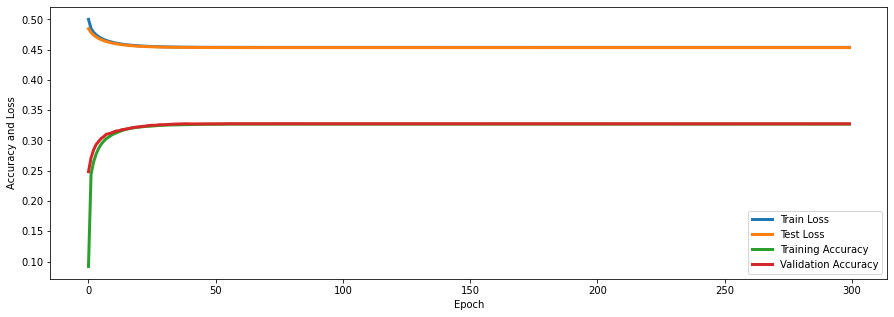

In [42]:
plt.figure(figsize=(15,5))
plt.plot(loss_history, linewidth=3, label = 'Train Loss')
plt.plot(test_loss, linewidth=3, label = 'Test Loss')
plt.plot(train_acc_history, linewidth=3, label = "Training Accuracy")
plt.plot(val_acc_history,  linewidth=3, label =  "Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss') 
plt.legend()